In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# minimize a given function via gradient descent

### function parameters
# max_iterations: Maximum number of iterations to run
# threshold: Stop if the difference in function values between two successive iterations falls below this threshold
# w_init: Initial point from where to start gradient descent
# obj_func: Reference to the function that computes the objective function
# grad_func: Reference to the function that computes the gradient of the function
# extra_param: Extra parameters (if needed) for the obj_func and grad_func
# learning_rate: Step size for gradient descent. It should be in [0,1]

### function values
# w_history: All points in space, visited by gradient descent at which the objective function was evaluated
# f_history: Corresponding value of the objective function computed at each point
def gradient_descent(max_iterations,threshold,w_init,
                     obj_func,grad_func,learning_rate=0.05):    
    w = w_init
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        w = w - learning_rate*grad_func(w)
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

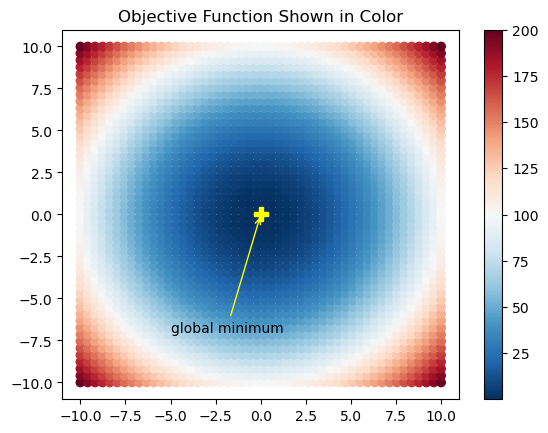

In [11]:
# The visualize_fw() function below, generates 2500 equally spaced points on a grid and computes the function value at each point.

# The function_plot() function displays all points in different colors, depending upon the value of f(w) at that point. 
# All points at which the function's value is the same, have the same color.

def visualize_fw():
    xcoord = np.linspace(-10,10,50)
    ycoord = np.linspace(-10,10,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow') 
pts,f_vals = visualize_fw()

In [4]:
xcoord = np.linspace(-10,10,3)
ycoord = np.linspace(-10,10,3)
print(xcoord)
print(ycoord)

[-10.   0.  10.]
[-10.   0.  10.]


In [7]:
w1,w2 = np.meshgrid(xcoord,ycoord)
pts = np.vstack((w1.flatten(),w2.flatten()))
print(pts)
pts = pts.transpose()
print(pts)

[[-10.   0.  10. -10.   0.  10. -10.   0.  10.]
 [-10. -10. -10.   0.   0.   0.  10.  10.  10.]]
[[-10. -10.]
 [  0. -10.]
 [ 10. -10.]
 [-10.   0.]
 [  0.   0.]
 [ 10.   0.]
 [-10.  10.]
 [  0.  10.]
 [ 10.  10.]]


In [8]:
f_vals = np.sum(pts*pts,axis=1)
print(f_vals)

[200. 100. 200. 100.   0. 100. 200. 100. 200.]


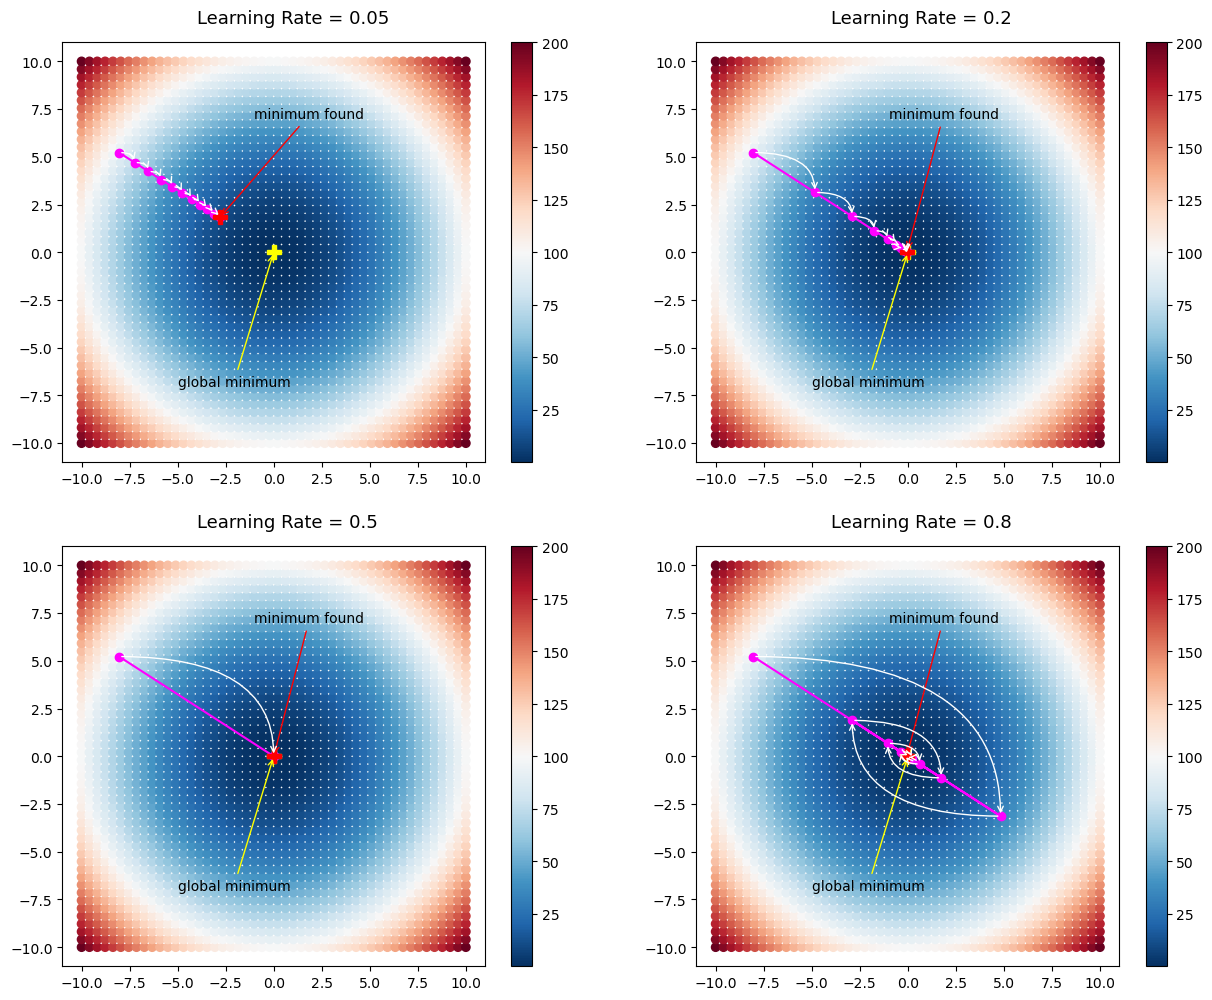

In [13]:
# f(): Computes the objective function at any point w
# grad(): Computes the gradient at any point w
# To understand the effect of various hyper-parameters on gradient descent,
# the function solve_fw() calls gradient_descent() with 5 iterations for different values of learning rate.
# The function visualize_learning(), plots the values of (w1,w2), with function values shown in different colors.
# The arrows in the plot make it easier to track which point was updated from the last:

# Objective function
def f(w):
    return np.sum(w*w)

# Function to compute the gradient
def grad(w):
    return 2*w

# Function to plot the objective function
# and learning history annotated by arrows
# to show how learning proceeded
def visualize_learning(w_history):  
    
     # Make the function plot
    function_plot(pts,f_vals)
    
    # Plot the history
    plt.plot(w_history[:,0],w_history[:,1],marker='o',c='magenta') 
    
    # Annotate the point found at last iteration
    annotate_pt('minimum found',
                (w_history[-1,0],w_history[-1,1]),
                (-1,7),'red')
    iter = w_history.shape[0]
    for w,i in zip(w_history,range(iter-1)):
        # Annotate with arrows to show history
        plt.annotate("", xy=w, xytext=w_history[i+1,:], 
                     arrowprops=dict(arrowstyle='<-',color="white",
                                     connectionstyle='angle3'))         
def solve_fw():
    # Setting up
    np.random.seed(19)
    w_init = np.random.uniform(-10,10,2)
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    learning_rates = [0.05,0.2,0.5,0.8]
    p = 1
    # Iteration through all possible parameter combinations
    for eta in learning_rates:
        plt.subplot(2,2,p) 
        w_history,f_history = gradient_descent(10,0.001,w_init, f,grad,eta)            
        visualize_learning(w_history)
        plt.text(-4, 12,'Learning Rate = '+str(eta),fontsize=13)
        p +=1
    plt.show()
solve_fw()